In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid") 

In [122]:
train_original = pd.read_csv(r"C:\Users\sanjay\Desktop\Analytics vidya competition\train_loan prediction.csv")
test_original = pd.read_csv(r"C:\Users\sanjay\Desktop\Analytics vidya competition\test_loan prediction.csv")

In [222]:
train = train_original.copy()
test = test_original.copy()

In [124]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [125]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [126]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [127]:
train.drop_duplicates(inplace = True)
train.shape

(614, 13)

### Analyze missing value

In [128]:
## 1. Analyze Missing value
feature_nan = [feature for feature in train.columns if train[feature].isnull().sum()>0]
print(len(feature_nan)) #seeing missing value of both conti+categ features (complete bank dataset)
train[feature_nan].head()

7


,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,No,NaN,360.0,1.0
1,Male,Yes,1,No,128.0,360.0,1.0
2,Male,Yes,0,Yes,66.0,360.0,1.0
3,Male,Yes,0,No,120.0,360.0,1.0
4,Male,No,0,No,141.0,360.0,1.0


In [129]:
## 2. Work with missing values in continuous variables & impute it
conti_feature = [feature for feature in train.columns if train[feature].dtypes != 'O']
print(len(conti_feature))
conti_feature

5


['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [130]:
conti_feature_nan = [feature for feature in conti_feature if train[feature].isnull().sum()>0]
print('no. of continuous feature with missing value',len(conti_feature_nan))
print('no of missing value in that continuous feature is {}'.format(train[conti_feature_nan].isnull().sum()))

no. of continuous feature with missing value 3
no of missing value in that continuous feature is LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64


In [131]:
## 3. Work with missing values in categorical variables & impute it
cate_feature = [feature for feature in train.columns if (train[feature].dtypes == 'O')]
print(len(cate_feature))

8


In [132]:
cate_feature_nan = [feature for feature in cate_feature if train[feature].isnull().sum()>0]
print('no. of categorical feature with missing value',len(cate_feature_nan))
print('no of missing value in that categorical feature is {}'.format(train[cate_feature_nan].isnull().sum()))

no. of categorical feature with missing value 4
no of missing value in that categorical feature is Gender           13
Married           3
Dependents       15
Self_Employed    32
dtype: int64


In [133]:
#imputing continuous variable
train[conti_feature_nan] = train[conti_feature_nan].apply(lambda x: x.fillna(x.median()))
train[conti_feature_nan] 

,LoanAmount,Loan_Amount_Term,Credit_History
0,128.0,360.0,1.0
1,128.0,360.0,1.0
2,66.0,360.0,1.0
3,120.0,360.0,1.0
4,141.0,360.0,1.0
...,...,...,...
609,71.0,360.0,1.0
610,40.0,180.0,1.0
611,253.0,360.0,1.0
612,187.0,360.0,1.0


In [134]:
#imputing categorical variable
train[cate_feature_nan] = train[cate_feature_nan].apply(lambda x: x.fillna(x.value_counts().index[0]))
train[cate_feature_nan].isnull().sum()

Gender           0
Married          0
Dependents       0
Self_Employed    0
dtype: int64

In [135]:
train[cate_feature_nan]

,Gender,Married,Dependents,Self_Employed
0,Male,No,0,No
1,Male,Yes,1,No
2,Male,Yes,0,Yes
3,Male,Yes,0,No
4,Male,No,0,No
...,...,...,...,...
609,Female,No,0,No
610,Male,Yes,3+,No
611,Male,Yes,1,No
612,Male,Yes,2,No


In [136]:
train[cate_feature_nan].isnull().sum()

Gender           0
Married          0
Dependents       0
Self_Employed    0
dtype: int64

In [137]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

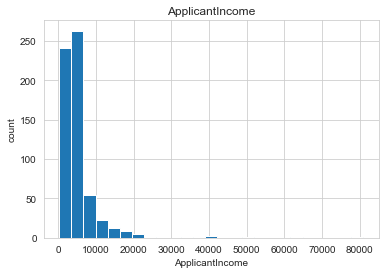

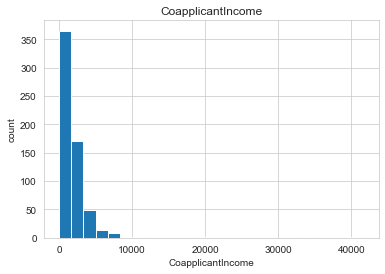

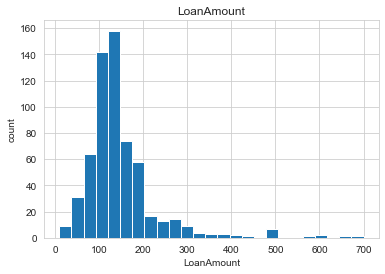

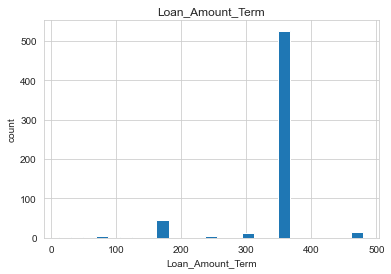

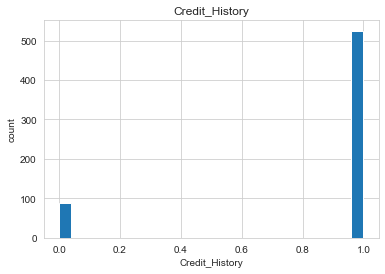

In [138]:
for feature in conti_feature:  #analyzed the conti variable by creating histograms to understand there distribution
    train[feature].hist(bins = 25)  
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [139]:
conti_feature

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

<AxesSubplot:>

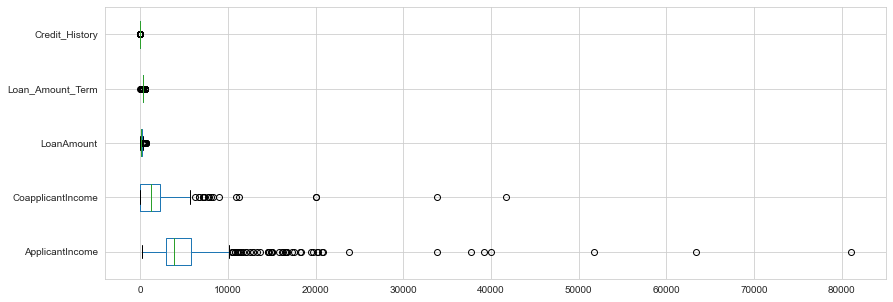

In [140]:
train[conti_feature].plot.box(grid = True,vert=False,figsize=(14,5))

In [141]:
train.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

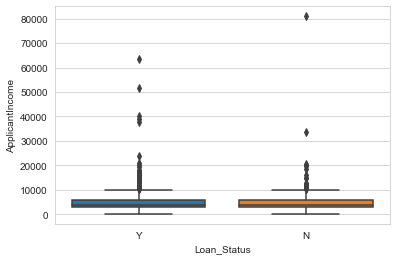

In [142]:
sns.boxplot(y='ApplicantIncome',x='Loan_Status',data=train)

<AxesSubplot:xlabel='Gender'>

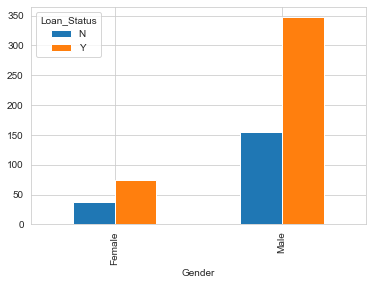

In [143]:
pd.crosstab(train['Gender'],train['Loan_Status']).plot.bar()

<AxesSubplot:xlabel='Married'>

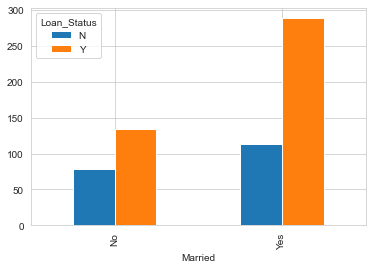

In [144]:
pd.crosstab(train['Married'],train['Loan_Status']).plot.bar()

In [145]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [146]:
train[cate_feature].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


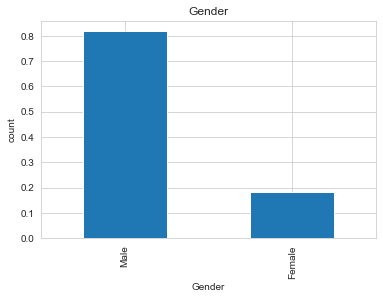

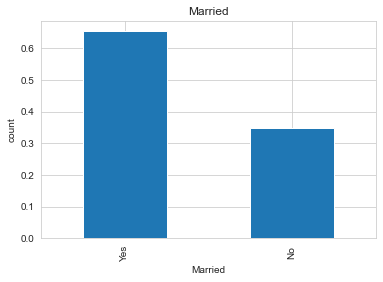

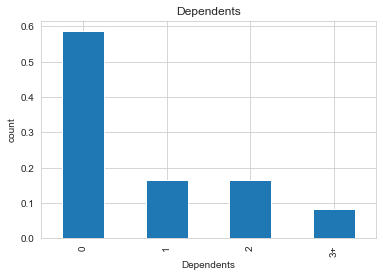

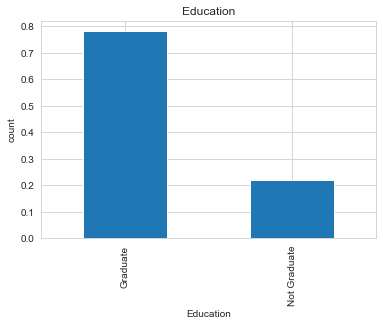

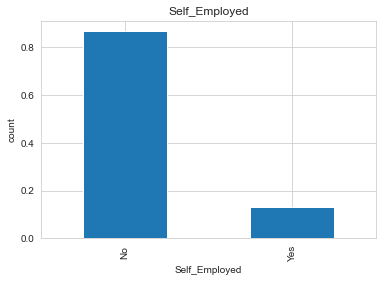

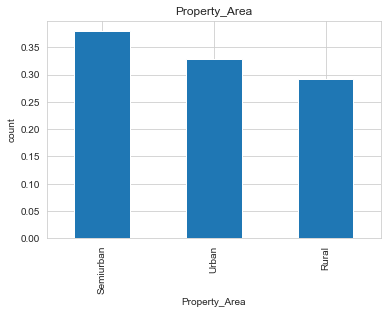

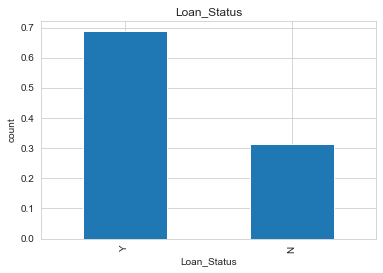

In [147]:
for feature in cate_feature:
    if feature in 'Loan_ID':
        pass
    else:
        (train[feature].value_counts()/len(train)).plot.bar()
        plt.xlabel(feature)
        plt.ylabel('count')
        plt.title(feature)
        plt.show()

In [148]:
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [149]:
for col in train[cate_feature].columns:              #in order to check that how many labels each categorical feature has 
    print(col ,':' ,len(train[col].unique()),'labels')        #data[col] give us the values inside the dataset col. by col.

Loan_ID : 614 labels
Gender : 2 labels
Married : 2 labels
Dependents : 4 labels
Education : 2 labels
Self_Employed : 2 labels
Property_Area : 3 labels
Loan_Status : 2 labels


In [150]:
train['Loan_ID'].value_counts().to_dict()  

{'LP002398': 1,
 'LP001824': 1,
 'LP002588': 1,
 'LP002181': 1,
 'LP001241': 1,
 'LP002243': 1,
 'LP001179': 1,
 'LP001640': 1,
 'LP001633': 1,
 'LP002478': 1,
 'LP001002': 1,
 'LP001405': 1,
 'LP001940': 1,
 'LP001482': 1,
 'LP002545': 1,
 'LP002755': 1,
 'LP002537': 1,
 'LP001120': 1,
 'LP001800': 1,
 'LP001106': 1,
 'LP001606': 1,
 'LP001935': 1,
 'LP001843': 1,
 'LP002138': 1,
 'LP001343': 1,
 'LP002625': 1,
 'LP002634': 1,
 'LP001046': 1,
 'LP001868': 1,
 'LP002530': 1,
 'LP001008': 1,
 'LP001778': 1,
 'LP001443': 1,
 'LP001865': 1,
 'LP001798': 1,
 'LP002534': 1,
 'LP001711': 1,
 'LP001233': 1,
 'LP002143': 1,
 'LP002098': 1,
 'LP001574': 1,
 'LP002862': 1,
 'LP001570': 1,
 'LP001036': 1,
 'LP002931': 1,
 'LP001222': 1,
 'LP002978': 1,
 'LP001616': 1,
 'LP002807': 1,
 'LP001006': 1,
 'LP002255': 1,
 'LP001761': 1,
 'LP001266': 1,
 'LP002961': 1,
 'LP002170': 1,
 'LP002943': 1,
 'LP002366': 1,
 'LP001198': 1,
 'LP001116': 1,
 'LP001751': 1,
 'LP001813': 1,
 'LP002738': 1,
 'LP0016

In [151]:
# And now let's replace each label in X2 by its count

# first we make a dictionary that maps each label to the counts
train_frequency_map = train['Loan_ID'].value_counts().to_dict()

In [152]:
train['Loan_ID'] = train['Loan_ID'].map(train_frequency_map)

In [153]:
train['Loan_ID'].head(4)

0    1
1    1
2    1
3    1
Name: Loan_ID, dtype: int64

In [154]:
cate_feature = train[cate_feature]

In [155]:
cate_feature.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,Male,No,0,Graduate,No,Urban,Y
1,1,Male,Yes,1,Graduate,No,Rural,N


In [156]:
cate_feature.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [157]:
cate_feature['Loan_Status'] = cate_feature['Loan_Status'].map({'Y': 1, 'N': 0})

C:\Users\sanjay\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
cate_feature.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [159]:
cate_feature_final = pd.get_dummies(cate_feature)

In [160]:
cate_feature_final

,Loan_ID,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,1,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,1,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,1,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [161]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [162]:
train = train.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'],1)

In [163]:
train.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0


In [164]:
train1 = pd.concat([train,cate_feature_final],1)
train1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1


In [165]:
#splitting tha dataset into train and test
X = train1.drop(['Loan_Status'],axis=1)
y = train1['Loan_Status']
X.shape, y.shape

((614, 21), (614,))

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

In [167]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(429, 21)
(185, 21)
(429,)
(185,)


In [168]:
train1.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_ID                    0
Loan_Status                0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [170]:
y_pred = logreg.predict(X_val)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_val, y_val)))

Accuracy of logistic regression classifier on test set: 0.83


In [171]:
confusion_matrix = confusion_matrix(y_val, y_pred)
print(confusion_matrix)

[[ 22  29]
 [  2 132]]


In [174]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



In [175]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#this param_grid intake all the argument of a LOGISTIC REGRESSION MODEL, since we are dealing with logistic regression only,
# and the arguments will be different for different models (*****IMPORTANT *******)
param_grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']} #c parameter is inverse of regularization strength
#just applying cross validation(as this is the parameter which is fed in gridsearchcv)((*****IMPORTANT *******))
cv=KFold(n_splits=5,shuffle = True, random_state = 0)
#here these are the parameters of gridsearchcv(*****IMPORTANT *******)
clf = GridSearchCV(logreg, param_grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

C:\Users\sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [176]:
y_pred = clf.predict(X_val)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_val, y_val)))

Accuracy of logistic regression classifier on test set: 0.74


In [177]:
print(clf.best_params_)

{'C': 10.0, 'penalty': 'l2'}


AxesSubplot(0.125,0.125;0.62x0.755)
[[ 22  29]
 [  2 132]]


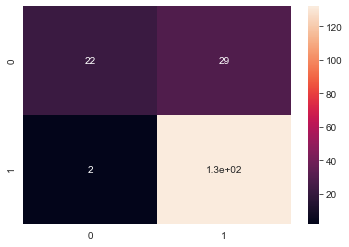

In [178]:
## Check this link : https://stackoverflow.com/questions/55845173/sklearn-confusion-matrix-typeerror-numpy-ndarray-object-is-not-callable
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)
print(sns.heatmap(cm, annot=True))
print(cm)

In [179]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



In [180]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [181]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.17200014 0.12188238 0.17591903 0.03667637 0.26319353 0.
 0.01589297 0.01332968 0.01255864 0.01126087 0.02279655 0.01692578
 0.0158127  0.01432099 0.01226735 0.01347697 0.0157833  0.01603786
 0.01790798 0.01672827 0.01522866]


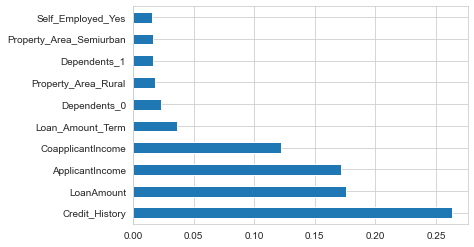

In [182]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

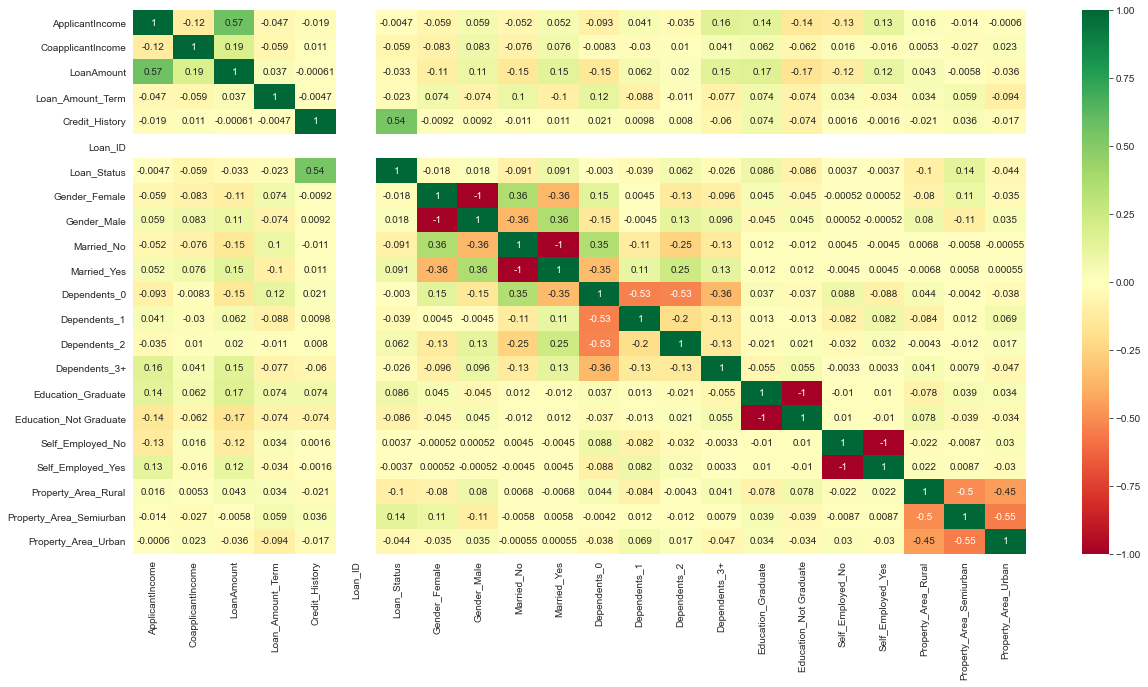

In [183]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = train1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
#plot heat map
g=sns.heatmap(train1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [184]:
train1.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_ID', 'Loan_Status',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

### decision tree

In [185]:
#splitting tha dataset into train and test
X = train1.drop(['Loan_Status'],axis=1)
y = train1['Loan_Status']
X.shape, y.shape

((614, 21), (614,))

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

In [187]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_val)
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(dtc.score(X_val, y_val)))

Accuracy of Decision Tree Classifier on test set: 0.75


In [188]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
# print(sns.heatmap(cm, annot=True))
print(cm)

[[ 26  25]
 [ 22 112]]


In [189]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.51      0.53        51
           1       0.82      0.84      0.83       134

    accuracy                           0.75       185
   macro avg       0.68      0.67      0.68       185
weighted avg       0.74      0.75      0.74       185



In [190]:
from scipy.stats import randint
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
#this param_grid intake all the argument of a LOGISTIC REGRESSION MODEL, since we are dealing with logistic regression only,
# and the arguments will be different for different models (*****IMPORTANT *******)
param_grid = {"criterion":['gini','entropy'],
              "max_depth": range(1,30), 
              "max_leaf_nodes": range(2,30), #max_leaf_node could not start from 1
              "min_samples_leaf": randint(1,20),
              "min_samples_split":range(1,30),
             "splitter":['best','random']} 
#just applying cross validation(as this is the parameter which is fed in gridsearchcv)((*****IMPORTANT *******))
cv=KFold(n_splits=5,shuffle = True, random_state = 42)
#here these are the parameters of gridsearchcv(*****IMPORTANT *******)
rsc = RandomizedSearchCV(dtc,param_grid,cv=cv,verbose=2,random_state = 42,n_jobs=-1)
rsc.fit(X_train,y_train)
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(rsc.best_params_)) 
print("Best score is {}".format(rsc.best_score_)) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 3, 'min_samples_leaf': 1, 'min_samples_split': 12, 'splitter': 'random'}
Best score is 0.8019151846785226


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


In [192]:
y_pred = rsc.predict(X_val)
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(rsc.score(X_val, y_val)))

Accuracy of Decision Tree Classifier on test set: 0.83


## RandomForestClassifier

In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(rf.score(X_val, y_val)))

Accuracy of Decision Tree Classifier on test set: 0.78


In [194]:
from sklearn.model_selection import RandomizedSearchCV  #initializing parameter now
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [195]:
# Use the random grid to search for best hyperparameters  #done to check which are best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 6, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   14.4s finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=6,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [196]:
rf_random.best_params_   #check for best parameter

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [197]:
#score on training data           #reduced slightly but atleast now the training data isn't overfitting
rf_random.score(X_train, y_train)

0.8438228438228438

In [198]:
#score on training data           #improved slightly
rf_random.score(X_val, y_val)

0.8108108108108109

In [199]:
y_predict = rf_random.predict(X_val)
DT=pd.DataFrame({'Actual':y_val, 'Predicted':y_predict})  
DT.head(10)

,Actual,Predicted
454,1,1
52,0,1
536,1,1
469,0,1
55,1,1
62,0,0
539,1,1
432,1,0
367,0,0
482,1,1


## knn

In [200]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier as KNN #for importing the regressor

In [201]:
reg = KNN(n_neighbors = 30) #creating an instance/object of KNN
reg.fit(X_train,y_train) #fitting the model on just the TRAIN data
test_predict = reg.predict(X_val)
print('Accuracy of knn Classifier on test set: {:.2f}'.format(reg.score(X_val, y_val)))

Accuracy of knn Classifier on test set: 0.72


## naive bayes

In [202]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() #creating an instance/object of KNN
model.fit(X_train,y_train) #fitting the model on just the TRAIN data
test_predict = reg.predict(X_val)
print('Accuracy of naive Classifier on test set: {:.2f}'.format(model.score(X_val, y_val)))

Accuracy of naive Classifier on test set: 0.82


## stacking

In [87]:
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from matplotlib import pyplot
# from sklearn.ensemble import StackingClassifier

In [157]:
# def get_models():
#     models = dict()
#     models['model'] = GaussianNB()
#     models['reg'] = KNN(n_neighbors = 30)
#     models['rf_random'] = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
#                                n_iter = 6, cv = 10, verbose=2, random_state=42, n_jobs = -1)
#     models['rsc'] = RandomizedSearchCV(dtc,param_grid,cv=cv,verbose=2,random_state = 42,n_jobs=-1)
#     models['logreg'] = LogisticRegression()
#     return models

In [158]:
# # evaluate a given model using cross-validation
# def evaluate_model(model, X, y):
#     cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#     scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#     return scores

In [159]:
# #splitting tha dataset into train and test
# X = train1.drop(['Loan_Status'],axis=1)
# y = train1['Loan_Status']

In [160]:
# # get the models to evaluate
# models = get_models()

>model 0.792 (0.043)
>reg 0.684 (0.021)
>rf_random 0.802 (0.032)
>rsc 0.809 (0.027)
>logreg 0.804 (0.037)


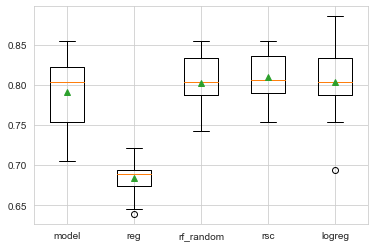

In [161]:
# # evaluate the models and store results
# results, names = list(), list()
# for name, model in models.items():
#     scores = evaluate_model(model, X, y)
#     results.append(scores)
#     names.append(name)
#     print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()

In [ ]:
# # get a stacking ensemble of models
# def get_stacking():
# # define the base models
#     level0 = list()
#     level0.append(('model' , GaussianNB()))
#     level0.append(('reg' , KNN(n_neighbors = 30)))
#     level0.append(('rf_random' , RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
#                                n_iter = 6, cv = 10, verbose=2, random_state=42, n_jobs = -1)))
#     level0.append(('rsc' , RandomizedSearchCV(dtc,param_grid,cv=cv,verbose=2,random_state = 42,n_jobs=-1)))
#     level0.append(('logreg' , LogisticRegression()))
# # define meta learner model
#     level1 = LogisticRegression()
# # define the stacking ensemble
#     model = StackingClassifier(estimators=level0, final_estimator=level1,cv=5)
#     return model


# def get_models():
#     models = dict()
#     models['model'] = GaussianNB()
#     models['reg'] = KNN(n_neighbors = 30)
#     models['rf_random'] = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
#                                n_iter = 6, cv = 10, verbose=2, random_state=42, n_jobs = -1)
#     models['rsc'] = RandomizedSearchCV(dtc,param_grid,cv=cv,verbose=2,random_state = 42,n_jobs=-1)
#     models['logreg'] = LogisticRegression()
#     models['stacking'] = get_stacking()
#     return models

# # evaluate a give model using cross-validation
# def evaluate_model(model, X, y):
#     cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#     scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#     return scores

# # define dataset
# X = train1.drop(['Loan_Status'],axis=1)
# y = train1['Loan_Status']

# # get the models to evaluate
# models = get_models()

# # evaluate the models and store results
# results, names = list(), list()
# for name, model in models.items():
#     scores = evaluate_model(model, X, y)
#     results.append(scores)
#     names.append(name)
#     print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()

>model 0.792 (0.043)
>reg 0.684 (0.021)
>rf_random 0.803 (0.034)
>rsc 0.808 (0.029)
>logreg 0.804 (0.037)


In [223]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [224]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [225]:
## 2. Work with missing values in continuous variables & impute it
conti_feature = [feature for feature in test.columns if test[feature].dtypes != 'O']
print(len(conti_feature))
conti_feature

5


['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [226]:
## 2. Work with missing values in continuous variables & impute it
cate_feature = [feature for feature in test.columns if test[feature].dtypes == 'O']
print(len(cate_feature))
cate_feature

7


['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [227]:
conti_feature_nan = [feature for feature in conti_feature if test[feature].isnull().sum()>0]
print('no. of continuous feature with missing value',len(conti_feature_nan))
print('no of missing value in that continuous feature is {}'.format(test[conti_feature_nan].isnull().sum()))

no. of continuous feature with missing value 3
no of missing value in that continuous feature is LoanAmount           5
Loan_Amount_Term     6
Credit_History      29
dtype: int64


In [228]:
cate_feature_nan = [feature for feature in cate_feature if test[feature].isnull().sum()>0]
print('no. of categorical feature with missing value',len(cate_feature_nan))
print('no of missing value in that categorical feature is {}'.format(test[cate_feature_nan].isnull().sum()))

no. of categorical feature with missing value 3
no of missing value in that categorical feature is Gender           11
Dependents       10
Self_Employed    23
dtype: int64


In [229]:
test[conti_feature_nan] = test[conti_feature_nan].apply(lambda x: x.fillna(x.median()))
test[conti_feature_nan] 

,LoanAmount,Loan_Amount_Term,Credit_History
0,110.0,360.0,1.0
1,126.0,360.0,1.0
2,208.0,360.0,1.0
3,100.0,360.0,1.0
4,78.0,360.0,1.0
...,...,...,...
362,113.0,360.0,1.0
363,115.0,360.0,1.0
364,126.0,360.0,1.0
365,158.0,360.0,1.0


In [230]:
#imputing categorical variable
test[cate_feature_nan] = test[cate_feature_nan].apply(lambda x: x.fillna(x.value_counts().index[0]))
test[cate_feature_nan].isnull().sum()

Gender           0
Dependents       0
Self_Employed    0
dtype: int64

In [231]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [232]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [234]:
test[cate_feature].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,Urban
1,LP001022,Male,Yes,1,Graduate,No,Urban
2,LP001031,Male,Yes,2,Graduate,No,Urban
3,LP001035,Male,Yes,2,Graduate,No,Urban
4,LP001051,Male,No,0,Not Graduate,No,Urban


In [235]:
test['Loan_ID'].value_counts().to_dict()  
# first we make a dictionary that maps each label to the counts
test_frequency_map = test['Loan_ID'].value_counts().to_dict()
test['Loan_ID'] = test['Loan_ID'].map(test_frequency_map)
test['Loan_ID'].head(4)

0    1
1    1
2    1
3    1
Name: Loan_ID, dtype: int64

In [236]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,1,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,1,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,1,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [237]:
cate_feature = test[cate_feature]

In [238]:
cate_feature_final = pd.get_dummies(cate_feature)
cate_feature_final.head()

,Loan_ID,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [239]:
test.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area'],1,inplace = True)

In [240]:
test1 = pd.concat([test,cate_feature_final],1)

In [241]:
test1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1


In [242]:
y_pred = rsc.predict(test1) #just creating a dataframe with actual and predicted test (y) values for new case
F=pd.DataFrame({'Item_Identifier': test1['Loan_ID'],'Predicted':y_pred})  
F.head(10)

,Item_Identifier,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,0
8,1,1
9,1,1


In [243]:
F['Predicted'] = F['Predicted'].map({1: 'Y', 0: 'N'})

In [249]:
F.head(20)

,Item_Identifier,Predicted
0,1,Y
1,1,Y
2,1,Y
3,1,Y
4,1,Y
5,1,Y
6,1,Y
7,1,N
8,1,Y
9,1,Y


In [251]:
F.shape

(367, 2)

In [261]:
submission = pd.read_csv(r"C:\Users\sanjay\Desktop\Analytics vidya competition\sample_submission_loan prediction.csv")

In [262]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [263]:
submission.drop(['Loan_Status'],1,inplace = True)
submission['Loan_Status'] = F['Predicted']

In [266]:
submission.head(20)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [267]:
submission.to_csv(r"C:\Users\sanjay\Desktop\Analytics vidya competition\sample_submission_loan prediction.csv",index = False)